<a href="https://colab.research.google.com/github/raunaqSingh0713/face-mask-detection/blob/main/FacemaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#upload kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 159M/163M [00:01<00:00, 141MB/s]
100% 163M/163M [00:01<00:00, 131MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os

In [ ]:
filenames_with_mask = os.listdir('/content/data/with_mask') 

['with_mask_6.jpg', 'with_mask_3699.jpg', 'with_mask_345.jpg', 'with_mask_127.jpg', 'with_mask_2078.jpg', 'with_mask_2408.jpg', 'with_mask_148.jpg', 'with_mask_2170.jpg', 'with_mask_1068.jpg', 'with_mask_674.jpg', 'with_mask_3104.jpg', 'with_mask_2272.jpg', 'with_mask_2651.jpg', 'with_mask_2595.jpg', 'with_mask_2268.jpg', 'with_mask_875.jpg', 'with_mask_3179.jpg', 'with_mask_1284.jpg', 'with_mask_228.jpg', 'with_mask_3134.jpg', 'with_mask_3050.jpg', 'with_mask_3115.jpg', 'with_mask_959.jpg', 'with_mask_3117.jpg', 'with_mask_557.jpg', 'with_mask_1215.jpg', 'with_mask_3703.jpg', 'with_mask_60.jpg', 'with_mask_2667.jpg', 'with_mask_954.jpg', 'with_mask_1646.jpg', 'with_mask_1744.jpg', 'with_mask_399.jpg', 'with_mask_1985.jpg', 'with_mask_2905.jpg', 'with_mask_1224.jpg', 'with_mask_2707.jpg', 'with_mask_3543.jpg', 'with_mask_151.jpg', 'with_mask_177.jpg', 'with_mask_3144.jpg', 'with_mask_3121.jpg', 'with_mask_1712.jpg', 'with_mask_1498.jpg', 'with_mask_2449.jpg', 'with_mask_1034.jpg', 'wit

In [ ]:
filenames_without_mask = os.listdir('/content/data/without_mask')

['without_mask_3153.jpg', 'without_mask_2195.jpg', 'without_mask_2769.jpg', 'without_mask_2008.jpg', 'without_mask_2877.jpg', 'without_mask_3152.jpg', 'without_mask_2760.jpg', 'without_mask_2541.jpg', 'without_mask_2748.jpg', 'without_mask_1417.jpg', 'without_mask_299.jpg', 'without_mask_880.jpg', 'without_mask_2770.jpg', 'without_mask_3763.jpg', 'without_mask_2068.jpg', 'without_mask_3391.jpg', 'without_mask_1088.jpg', 'without_mask_3612.jpg', 'without_mask_3737.jpg', 'without_mask_3598.jpg', 'without_mask_2743.jpg', 'without_mask_58.jpg', 'without_mask_2513.jpg', 'without_mask_1555.jpg', 'without_mask_2363.jpg', 'without_mask_2956.jpg', 'without_mask_992.jpg', 'without_mask_2442.jpg', 'without_mask_322.jpg', 'without_mask_3121.jpg', 'without_mask_365.jpg', 'without_mask_1311.jpg', 'without_mask_1443.jpg', 'without_mask_3205.jpg', 'without_mask_3102.jpg', 'without_mask_2596.jpg', 'without_mask_520.jpg', 'without_mask_3642.jpg', 'without_mask_2704.jpg', 'without_mask_249.jpg', 'without

In [ ]:
num_of_with_mask = len(filenames_with_mask)

Number of images with mask:  3725


In [ ]:
num_of_without_mask = len(filenames_without_mask)

Number of images without mask:  3828


In [ ]:
  import numpy as np
  from PIL import Image
  import matplotlib.image as mpimg
  import matplotlib.pyplot as plt
  from sklearn.model_selection import train_test_split  

**Creating labels for two class of images**

In [ ]:
with_mask_labels = [1] * num_of_with_mask

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
without_mask_labels = [0] * num_of_without_mask

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
labels = with_mask_labels + without_mask_labels

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

0--> with mask (True)

1--> without mask (False)

understanding image dataset

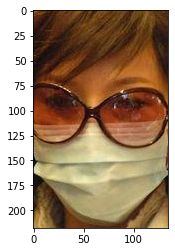

In [ ]:
#displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_10.jpg')
plt.imshow(img)

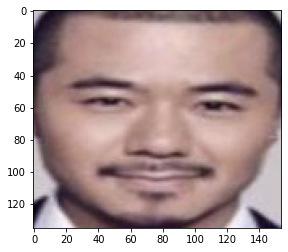

In [ ]:
#displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_10.jpg')
plt.imshow(img)

resizing images and saving these images in different folders  (since images have different dimensions, we cannot feed them into the neural network)

In [ ]:
#creating directories forresized images 
os.mkdir('with_mask_resized')
os.mkdir('without_mask_resized')

In [ ]:
#resize with mask images

with_mask_folder = '/content/data/with_mask/'
with_mask_resized_folder = '/content/with_mask_resized/'

for filename in os.listdir(with_mask_folder):
  img_path = with_mask_folder + filename
  img = Image.open(img_path)
  img = img.resize((128,128))  
  img = img.convert('RGB')
  newImgPath = with_mask_resized_folder + filename # path is changed of the resized images but individual filename of the image remains the same
  img.save(newImgPath)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
#resize without mask images

without_mask_folder = '/content/data/without_mask/'
without_mask_resized_folder = '/content/without_mask_resized/'

for filename in os.listdir(without_mask_folder):
  img_path = without_mask_folder + filename
  img = Image.open(img_path)
  img = img.resize((128,128))  
  img = img.convert('RGB')
  newImgPath = without_mask_resized_folder + filename # path is changed of the resized images but individual filename of the image remains the same
  img.save(newImgPath)

**Converting images into numpy array**

In [ ]:
import cv2
import glob

In [ ]:
#reading with mask images
imdir = '/content/with_mask_resized/'
ext = ['png','jpg']

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

with_mask_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
#reading without mask images
imdir = '/content/without_mask_resized/'
ext = ['png','jpg']

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

without_mask_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(with_mask_images)

[[[[  8  11  16]
   [  6   9  14]
   [  3   6  10]
   ...
   [  5   3   2]
   [  7   2   3]
   [  7   2   3]]

  [[  7  10  15]
   [  6   9  13]
   [  4   7  11]
   ...
   [  6   4   3]
   [  7   2   3]
   [  7   2   3]]

  [[  8   9  13]
   [  8  10  11]
   [  8  10  11]
   ...
   [  6   4   3]
   [  8   4   3]
   [  7   3   2]]

  ...

  [[  7   6   2]
   [  7   6   2]
   [  7   6   2]
   ...
   [  6   7   3]
   [  7   6   2]
   [  5   5   0]]

  [[  7   6   2]
   [  7   6   2]
   [  7   6   2]
   ...
   [  3   7   2]
   [  3   4   0]
   [  1   3   0]]

  [[  7   6   2]
   [  7   6   2]
   [  7   6   2]
   ...
   [  2   6   1]
   [  2   3   0]
   [  0   2   0]]]


 [[[ 42  40  40]
   [ 37  35  35]
   [ 30  28  28]
   ...
   [ 37  38  34]
   [ 38  39  35]
   [ 40  41  37]]

  [[ 51  49  49]
   [ 50  48  48]
   [ 48  46  46]
   ...
   [ 36  37  33]
   [ 33  34  30]
   [ 31  32  28]]

  [[ 15  13  13]
   [ 20  18  18]
   [ 29  27  27]
   ...
   [ 43  42  38]
   [ 41  40  36]
   [ 40  39

In [ ]:
print(with_mask_images.shape)
print(without_mask_images.shape)

(3725, 128, 128, 3)
(3828, 128, 128, 3)


In [ ]:
combined_images = np.concatenate((with_mask_images, without_mask_images))

In [ ]:
print(combined_images.shape)

(7553, 128, 128, 3)


In [ ]:
# data and labels
X = combined_images
Y = np.asarray(labels)

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, Y.shape, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(7553, 128, 128, 3) (7553,) (6042, 128, 128, 3) (6042,) (1511, 128, 128, 3) (1511,)


In [ ]:
print(X_train[0])

[[[8 8 8]
  [3 3 3]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[7 7 7]
  [2 2 2]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [2 2 2]
  [3 3 3]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [3 3 3]]]


In [ ]:
#standardizing the data
X_train_std = X_train/255
X_test_std = X_test/255

In [ ]:
print(X_train_std[0])

[[[0.03137255 0.03137255 0.03137255]
  [0.01176471 0.01176471 0.01176471]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.00392157 0.00392157 0.00392157]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.02745098 0.02745098 0.02745098]
  [0.00784314 0.00784314 0.00784314]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.00784314 0.00784314 0.00784314]
  [0.01176471 0.01176471 0.01176471]
  [0.00392157 0.00392157 0.00392157]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


**Building the Neural Network**

In [ ]:
import tensorflow as tf
import keras

In [ ]:
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape = (128, 128, 3)),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(X_train_std, Y_train, epochs = 10)

Epoch 1/10
189/189 [==============================] - 17s 84ms/step - loss: 1.3538 - accuracy: 0.6864
Epoch 2/10
189/189 [==============================] - 16s 84ms/step - loss: 0.4081 - accuracy: 0.8261
Epoch 3/10
189/189 [==============================] - 15s 82ms/step - loss: 0.3818 - accuracy: 0.8421
Epoch 4/10
189/189 [==============================] - 15s 80ms/step - loss: 0.3701 - accuracy: 0.8479
Epoch 5/10
189/189 [==============================] - 15s 82ms/step - loss: 0.3735 - accuracy: 0.8494
Epoch 6/10
189/189 [==============================] - 15s 80ms/step - loss: 0.3557 - accuracy: 0.8537
Epoch 7/10
189/189 [==============================] - 15s 81ms/step - loss: 0.3205 - accuracy: 0.8696
Epoch 8/10
189/189 [==============================] - 15s 80ms/step - loss: 0.3066 - accuracy: 0.8792
Epoch 9/10
189/189 [==============================] - 16s 84ms/step - loss: 0.3177 - accuracy: 0.8712
Epoch 10/10
189/189 [==============================] - 15s 79ms/step - loss: 0.313

In [ ]:
score, acc = model.evaluate(X_test_std, Y_test)
print('Test data loss:', score)
print('Test data acc:', acc)

48/48 [==============================] - 1s 23ms/step - loss: 0.2679 - accuracy: 0.8908
Test data loss: 0.2679222524166107
Test data acc: 0.8908007740974426


**Building a Predictive System**

In [ ]:
from google.colab.patches import cv2_imshow 

In [ ]:
input_image_path = input('path ofthe image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128, 128))

input_image_resize = input_image_resize/255

image_reshape = np.reshape(input_image_resize, [1,128,128,3])

input_prediction = model.predict(image_reshape)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
  print('The person is wearing a mask')

else:
    print('The person is not wearing a mask')